<a href="https://colab.research.google.com/github/MHN-Main/4487/blob/main/advise_invest_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AdviseInvest

### Outline

Our Goals with this Project:

1. Import and review the data
2. Perform EDA and Clean Data
3. Fit a model
4. Test the accuracy of the model
6.  Use the model to predict on a new dataset (without the target)

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/Scripts/advise_invest_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### AdviseInvest Data Dictionary

Variable    |Description |Type    |Code
---- | ------- | ------ | -----
Answered       | Customer response |    Binary    |0: customer did not answer scheduled call; 1: customer answered scheduled call
Income       | Customer income in US dollars|	Numeric
Female       | Customer gender|	Binary	0: female; 1: male
Age	         | Age in years|	Numeric
Job          | Nature of job|	Categorical|	0 : unemployed; 1 : entry level position; 2 : midlevel position; 3 : management/ self-employed/ highly qualified employee/ officer
Num_dependents | Number of people for whom the customer provides maintenance|	Numeric
Rent	| Customer rents	|Binary	|0: no; 1: yes
Own_res	| Customer owns residence|	Binary|	0: no; 1: yes
New_car| Recent new car purchase	|Binary|	New car purchase in the last 3 months: 0: no, 1: yes
Chk_acct | Checking account status	|Categorical|	0 : no checking account; 1: checking < 200 USD; 2 : 200 < checking < 2000 USD; 3: 2000 < checking < 35000 USD; 4: >= 3500 USD
Sav_acct	| Average balance in savings account|	Categorical|	0 : no savings account; 1 : 100 <= savings < 500 USD; 2 : 500 <= savings < 2000 USD; 3 : 2000 < savings < 35000 USD; 4: >= 3500 USD
Num_accts	| Number of accounts owned by customer	|Numeric
Mobile	| Mobile phone	|Binary	|0: customer provided non‐mobile phone for follow‐up call; 1: customer provided mobile phone for follow‐up call
Product| Type of product purchased after conversation with sales rep	|Categorical|	0: customer did not answer call; 1: customer answered but did not purchase a product; 2: customer answered and purchased Beginner plan; 3: customer answered and purchased Intermediate plan; 4: customer answered and purchased Advanced plan



### Load Libraries

In this class we will be using
- Pandas
- Scikitlearn
- Matplotlib


In [1]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz # Import Decision Tree Classifier
from sklearn import metrics  #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


## Step 1: Initial Data Understanding

 - Import data from the AdviseInvest historical dataset into a dataframe (in GitHub go to Assignments > DataSets)
 - Describe or profile the dataframe
 - Look for any outliers, missing values, or duplicates

In [2]:
#Import the data
df = pd.read_csv('https://github.com/Stan-Pugsley/is_4487_base/blob/main/Assignments/DataSets/adviseinvest_historical_data.csv?raw=true')


In [3]:
#View the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29504 entries, 0 to 29503
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   answered        29504 non-null  int64  
 1   income          29504 non-null  int64  
 2   female          29504 non-null  object 
 3   age             29504 non-null  int64  
 4   job             29504 non-null  int64  
 5   num_dependents  29504 non-null  int64  
 6   rent            29504 non-null  int64  
 7   own_res         29504 non-null  int64  
 8   new_car         29502 non-null  float64
 9   chk_acct        29504 non-null  int64  
 10  sav_acct        29504 non-null  int64  
 11  num_accts       29504 non-null  int64  
 12  mobile          29504 non-null  int64  
 13  product         29504 non-null  int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 3.2+ MB


In [4]:
#Describe the data
df.describe()


,answered,income,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
count,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29502.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000
mean,0.546638,33766.893303,34.773454,1.915401,1.140998,0.210412,0.681128,0.240797,1.468547,0.956616,2.458345,0.091106,1.535792
std,0.497829,29379.202710,11.369865,0.658183,0.348025,0.407608,0.466047,0.427575,1.234727,1.483946,19.497380,0.287765,1.625916
min,0.000000,-65600.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13550.000000,26.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,23310.000000,32.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,41690.000000,40.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,3.000000
max,1.000000,159450.000000,132.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,3345.000000,1.000000,4.000000


## Step 2: Data Preparation

### 2.1: Data Cleanup
- Remove any variables that are not relevant to our analysis (if they relate to activity after the answer).
- Clean up the data and put it in a new datafram named "df_clean"


In [5]:
#delete outliers
Q1 = df[['income', 'age']].quantile(0.25)
Q3 = df[['income', 'age']].quantile(0.75)
IQR = Q3 - Q1
low_bound = Q1 - 1.5 * IQR
high_bound = Q3 + 1.5 * IQR
df_clean = df[~((df[['income', 'age']] < low_bound) | (df[['income', 'age']] > high_bound)).any(axis=1)]
df.head()

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
0,1,13520,0,23,0,1,1,0,0.0,0,2,0,1,2
1,0,14780,0,22,2,1,0,1,0.0,3,0,3,0,0
2,1,37570,0,62,2,1,0,0,1.0,3,0,4,0,4
3,0,12450,0,33,2,1,0,1,0.0,1,0,2,0,0
4,0,12400,0,48,1,2,0,0,1.0,2,1,4,0,0


In [6]:
#remove variables that are not helpful
df_clean = df_clean.drop(['new_car', 'mobile','product'], axis=1)
df_clean.head()

,answered,income,female,age,job,num_dependents,rent,own_res,chk_acct,sav_acct,num_accts
0,1,13520,0,23,0,1,1,0,0,2,0
1,0,14780,0,22,2,1,0,1,3,0,3
3,0,12450,0,33,2,1,0,1,1,0,2
4,0,12400,0,48,1,2,0,0,2,1,4
5,1,14030,0,28,2,1,1,0,0,0,2


In [7]:
#cleanup any missing or non-standardized data
df_clean = df_clean.dropna()
df_clean['income'] = df_clean['income'].fillna(df_clean['income'].mean())
df_clean['age'] = df_clean['age'].ffill()
df_clean.head(100)

,answered,income,female,age,job,num_dependents,rent,own_res,chk_acct,sav_acct,num_accts
0,1,13520,0,23,0,1,1,0,0,2,0
1,0,14780,0,22,2,1,0,1,3,0,3
3,0,12450,0,33,2,1,0,1,1,0,2
4,0,12400,0,48,1,2,0,0,2,1,4
5,1,14030,0,28,2,1,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
104,1,20580,1,33,2,1,0,1,3,0,2
105,0,83350,0,47,2,1,0,0,0,4,4
106,1,17660,0,21,2,1,1,0,3,0,2
107,0,31080,1,31,1,1,0,1,0,0,1


### 2.2: Standardize variables

 - Change "answered" to yes/no and make it categorical
 - Convert any variables that should be an integer into an integer

In [8]:
# Convert answered to categorical
df_clean['answered'] = pd.Categorical(df_clean['answered'].map({0: 'no', 1: 'yes'}, na_action=None))

In [9]:
# Convert variables to integer data type
df_clean['female'] = pd.to_numeric(df_clean['female'], errors='coerce').fillna(-1).astype(int)
df_clean.head(100)

,answered,income,female,age,job,num_dependents,rent,own_res,chk_acct,sav_acct,num_accts
0,yes,13520,0,23,0,1,1,0,0,2,0
1,no,14780,0,22,2,1,0,1,3,0,3
3,no,12450,0,33,2,1,0,1,1,0,2
4,no,12400,0,48,1,2,0,0,2,1,4
5,yes,14030,0,28,2,1,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
104,yes,20580,1,33,2,1,0,1,3,0,2
105,no,83350,0,47,2,1,0,0,0,4,4
106,yes,17660,0,21,2,1,1,0,3,0,2
107,no,31080,1,31,1,1,0,1,0,0,1


### 2.3 Convert variables to categorical

- Find at least 8 variables that would be appropriate to convert to categories

In [10]:
#Convert categorical variables
categorical_vars = ['answered', 'female', 'job', 'rent', 'own_res', 'chk_acct', 'sav_acct']
for var in categorical_vars:
    df_clean[var] = pd.Categorical(df_clean[var])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26302 entries, 0 to 29502
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   answered        26302 non-null  category
 1   income          26302 non-null  int64   
 2   female          26302 non-null  category
 3   age             26302 non-null  int64   
 4   job             26302 non-null  category
 5   num_dependents  26302 non-null  int64   
 6   rent            26302 non-null  category
 7   own_res         26302 non-null  category
 8   chk_acct        26302 non-null  category
 9   sav_acct        26302 non-null  category
 10  num_accts       26302 non-null  int64   
dtypes: category(7), int64(4)
memory usage: 1.2 MB


# Step 3: Exploratory Data Analysis (EDA)
- Explore the relationships between the target and independent variables
- Create at least five charts to show the relationships, using different chart types that are approriate to the analysis
- Ensure that all charts are clearly labeled and formatted

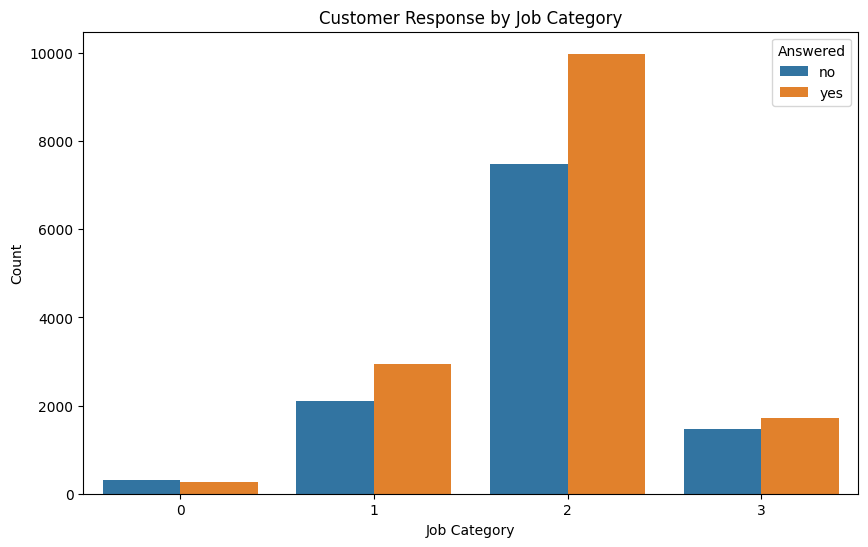

In [12]:
# Chart 1: Answered vs Job
plt.figure(figsize=(10, 6))
sns.countplot(x='job', hue='answered', data=df_clean)
plt.title('Customer Response by Job Category')
plt.xlabel('Job Category')
plt.ylabel('Count')
plt.legend(title='Answered')
plt.show()


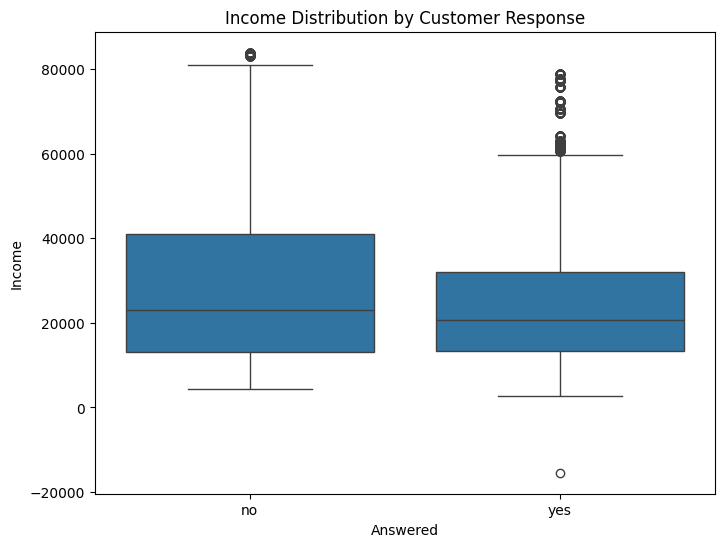

In [14]:
# Chart 2: Income vs Answered
plt.figure(figsize=(8, 6))
sns.boxplot(x='answered', y='income', data=df_clean)
plt.title('Income Distribution by Customer Response')
plt.xlabel('Answered')
plt.ylabel('Income')
plt.show()

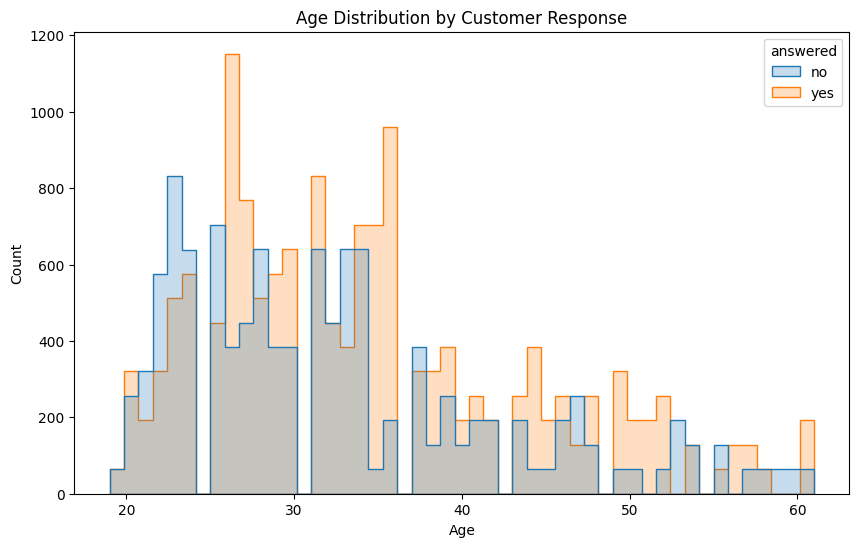

In [17]:
# Chart 3: Age and Answered
plt.figure(figsize=(10, 6))
sns.histplot(x='age', hue='answered', data=df_clean, element='step')
plt.title('Age Distribution by Customer Response')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

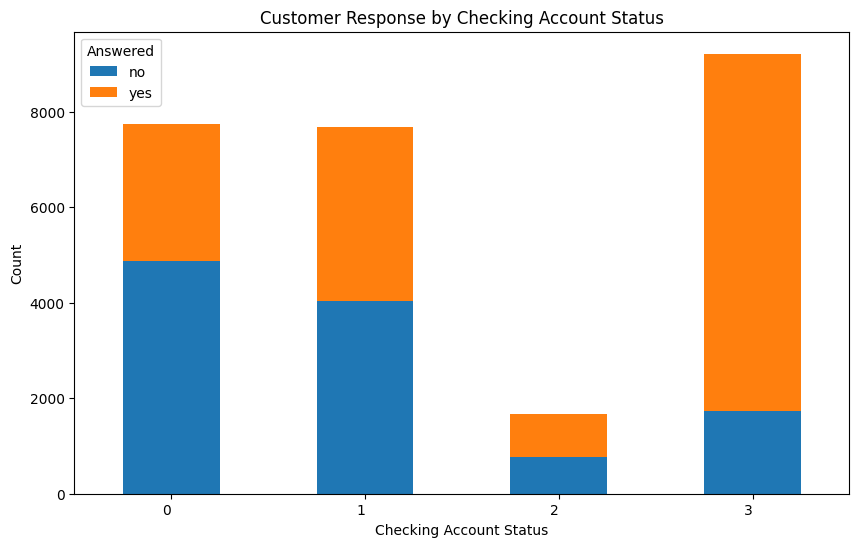

In [25]:
# Chart 4: Checking Account Status vs Answered
chk_acct_counts = pd.crosstab(df_clean['chk_acct'], df_clean['answered'])
chk_acct_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Customer Response by Checking Account Status')
plt.xlabel('Checking Account Status')
plt.ylabel('Count')
plt.xticks(rotation=0, ha='right')
plt.legend(title='Answered')
plt.show()

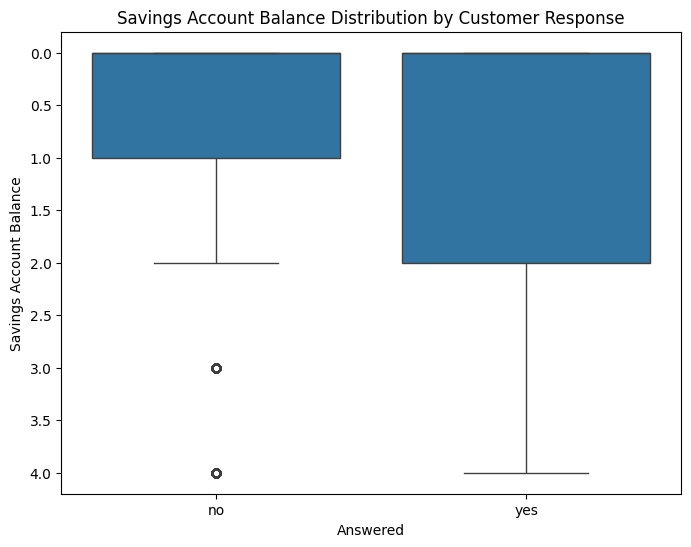

In [27]:
# Chart 5: Savings Account Balance vs. Answered
plt.figure(figsize=(8, 6))
sns.boxplot(x='answered', y='sav_acct', data=df_clean)
plt.title('Savings Account Balance Distribution by Customer Response')
plt.xlabel('Answered')
plt.ylabel('Savings Account Balance')
plt.show()

## Step 4: Modeling

### 4.1: Calculate the base probability of answering

If we use no model at all, how good is our chance of predicting someone leaving?

In [ ]:
#get the default probability

### 4.2: Split the training and testing datasets

- split df_clean using train_test_split function
- all variables except answered should be in the x variable
- answered is in the y variable


In [ ]:
# Split data into training and testing sets


### 4.3: Create a Decision Tree
- Use all available attributes (except those that were eliminated in step 3)
- It is recommended to use the type "entropy" and a max_depth of 4

In [ ]:
#create a tree

In [ ]:
#display (visualize) the tree

### 4.4: What is the accuracy?

This should be better than the base probability, or you have failed in your objective

In [ ]:
#calculate the probability for your tree

### 4.5: Create a confusion matrix

This will show false positives, true positives, etc.

In [ ]:
#create a basic confusion matrix


Create a more visual, interpretable version of the matrix

In [ ]:
#Create a beautiful matrix; hint - try using Seaborn Heatmap

# Step 5: Evaluate the Model

**Assumptions**

One of the simplifying assumptions we will make in this project is that all the customers who answer the phone will purchase a product. (This assumption is actually verified by the data.) To model "answered" in this case is therefore equivalent to modeling "purchased."

There are costs and benefits in this case. We will assume that customers purchase a product for 100 dollars. This was the average cost of AdviseInvest products, according to the Director of Sales.  Also, as we learned in the interview, the agent time to make the sale is worth 25 dollars. Profit would therefore be \$75 dollars for an answered call and a purchase. In sum:

**Benefit**: True positive. The customer is predicted to answer, does answer, and purchases a product for 100 dollars for a profit of 100 - 25 = 75.

**Cost**: False positive. The customer is predicted to answer, but does not answer, so there is a loss of 25. (We assume the agent cannot schedule another call at the last minute, or spends the entire time slot trying to make the call.)

When you create a calculation you can use:
- True answered * 75 -> These people purchased
- False answered * 25 -> You can't schedule another call

For this exercise, we propose that customers who are not predicted to answer will not be called, so there would be no benefits and no costs for them.  

### 5.1 Calculate the Profit Using the Model

In [ ]:
# Write a calcuation for the profit from your model

### 5.2 Compare to the Default Profit

How much profit (revenue - costs) could be expected if all customers are called? We can consider this a baseline case for profit since it does not require a model.

In other words, to calculate profit in this baseline scenario treat the customers who answer as true positives treat the customers who do not answer as false positives.

In [ ]:
#Write a calculation for the overall profit without using the model (default)

### 5.3 Tune the Model
- Adjust the size or shape of the tree, then test the accuracy
- Continue to make changes until you find a set of hyperparameters that improves the accuracy compared to the initial model

In [ ]:
# Create a new version of the tree with new parameters

In [ ]:
# Calculate a new probability

### 5.4 Apply the Model to New Customers
- Import the "adviseinvest_new_customer_data.csv" file
- Using the tree model, predict each customer for the target variable

In [ ]:
#Import new customer data into a new data frame

In [ ]:
#Predict the number of customers who will be yes/no for the target variable

# Step 6: Plan for Deployment
### 6.1: Did we improve our profit using the model?  

Write your conclusion notes below:

### 6.2: How should the model be deployed?

Write your recommendations below: